In [1]:
from fastai2.basics import *
from fastai2.vision.all import *
from pathlib import Path

from mish_cuda import MishCuda
import cmasher as cmr
import gc
import scipy.cluster.hierarchy as hcluster

from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, roc_curve
PATH = Path('../..').resolve()

seed = 256

In [2]:
df = pd.read_csv(PATH/'data/desi-sv.csv')
df.sample(5)

,OBJID,RA,DEC,r_mag,saga_p1_cut,saga_p2_cut
606638,905019800000002242,24.046801,31.262535,19.166084,True,False
185932,903355600000004023,218.170739,0.657705,21.873453,True,False
732764,915804390000000143,119.630781,48.953782,21.333872,True,False
650040,915133990000000838,154.653592,33.393085,21.212330,True,True
28093,903018510000005716,65.635739,-4.876726,21.636305,True,False


In [9]:
df.saga_p1_cut.sum(), df.saga_p2_cut.sum()

(860904, 88428)

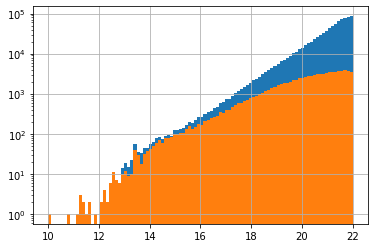

In [6]:
df.r_mag.hist(bins=100, range=[10, 22], log=True)
df[df.saga_p2_cut].r_mag.hist(bins=100, range=[10, 22], log=True)

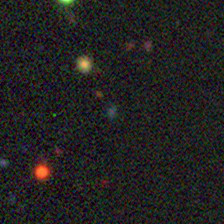

In [10]:
# currently we only have P2 cut images
PILImage.create(f'{PATH}/images-legacy_desi-sv/915133990000000838.jpg')